# Read Clade Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clade_df = pd.read_csv("../June_mutation_freq.csv")
clade_df.head()

,month,mutation,count,frequency
0,2020-04,M:A2V,8,0.015066
1,2020-04,N:D377G,15,0.028249
2,2020-04,N:E367K,1,0.001883
3,2020-04,N:G204R,57,0.107345
4,2020-04,N:M210I,2,0.003766


In [3]:
clade_df.shape

(2903, 4)

In [4]:
mutation_arr = set(list(clade_df['mutation']))
len(mutation_arr)

1711

In [6]:
clade_6month = pd.read_csv("../June_mutation_freq_6months.csv")
clade_6month.head()

,mutation,number_month
0,N:G204R,14
1,N:R203K,14
2,ORF1b:P314L,14
3,S:D614G,14
4,ORF3a:Q57H,13


In [7]:
clade_6month_list = list(clade_6month['mutation'])
len(clade_6month_list)

53

In [8]:
clade_info = {}

for index, row in clade_df.iterrows():
#     mutation_name = row['mutation'].split(":")[0]
    mutation_name = row['mutation']
    if(mutation_name not in clade_6month_list):    # filter out all the short lived mutations
        continue     
    
    month = row['month']
    if(mutation_name not in clade_info):
        clade_info[mutation_name] = {}
    if(month not in clade_info[mutation_name]):
        clade_info[mutation_name][month] = 0
    clade_info[mutation_name][month] += row["frequency"]

In [9]:
clade_info

{'N:G204R': {'2020-04': 0.107344632768362,
  '2020-05': 0.117117117117117,
  '2020-06': 0.126688102893891,
  '2020-07': 0.121761658031088,
  '2020-08': 0.120689655172414,
  '2020-09': 0.139130434782609,
  '2020-10': 0.0878186968838527,
  '2020-11': 0.0895196506550218,
  '2020-12': 0.0809090909090909,
  '2021-01': 0.0716332378223496,
  '2021-02': 0.0396158463385354,
  '2021-03': 0.0129950495049505,
  '2021-04': 0.0056689342403628,
  '2021-05': 0.0053763440860215},
 'N:R203K': {'2020-04': 0.107344632768362,
  '2020-05': 0.117117117117117,
  '2020-06': 0.126688102893891,
  '2020-07': 0.121761658031088,
  '2020-08': 0.120689655172414,
  '2020-09': 0.139130434782609,
  '2020-10': 0.0878186968838527,
  '2020-11': 0.0895196506550218,
  '2020-12': 0.0809090909090909,
  '2021-01': 0.0716332378223496,
  '2021-02': 0.0396158463385354,
  '2021-03': 0.0133044554455446,
  '2021-04': 0.0056689342403628,
  '2021-05': 0.0053763440860215},
 'ORF1a:I300F': {'2020-04': 0.0828625235404896,
  '2020-05': 0.1

In [10]:
month_arr = list(set(list(clade_df['month'])))
month_arr = sorted(month_arr)

In [11]:
mutation_freq_arr = {}

for mutation in clade_info:
    mutation_freq_arr[mutation] = np.zeros(len(month_arr))
    for i in range(len(month_arr)):
        month = month_arr[i]
        if(month in clade_info[mutation]):
            mutation_freq_arr[mutation][i] = clade_info[mutation][month]

In [12]:
print(month_arr)
mutation_freq_arr

['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05']


{'N:G204R': array([0.10734463, 0.11711712, 0.1266881 , 0.12176166, 0.12068966,
        0.13913043, 0.0878187 , 0.08951965, 0.08090909, 0.07163324,
        0.03961585, 0.01299505, 0.00566893, 0.00537634]),
 'N:R203K': array([0.10734463, 0.11711712, 0.1266881 , 0.12176166, 0.12068966,
        0.13913043, 0.0878187 , 0.08951965, 0.08090909, 0.07163324,
        0.03961585, 0.01330446, 0.00566893, 0.00537634]),
 'ORF1a:I300F': array([0.08286252, 0.11454311, 0.11382637, 0.11010363, 0.08275862,
        0.07391304, 0.08498584, 0.09388646, 0.07818182, 0.05921681,
        0.01440576, 0.00402228, 0.        , 0.        ]),
 'ORF1b:P314L': array([0.13559322, 0.14414414, 0.13954984, 0.13406736, 0.1       ,
        0.09130435, 0.11048159, 0.10043668, 0.08454545, 0.07449857,
        0.05162065, 0.04486386, 0.04450113, 0.03978495]),
 'ORF3a:K75N': array([0.00188324, 0.001287  , 0.00064309, 0.00064767, 0.        ,
        0.00434783, 0.        , 0.        , 0.00090909, 0.        ,
        0.        , 0.

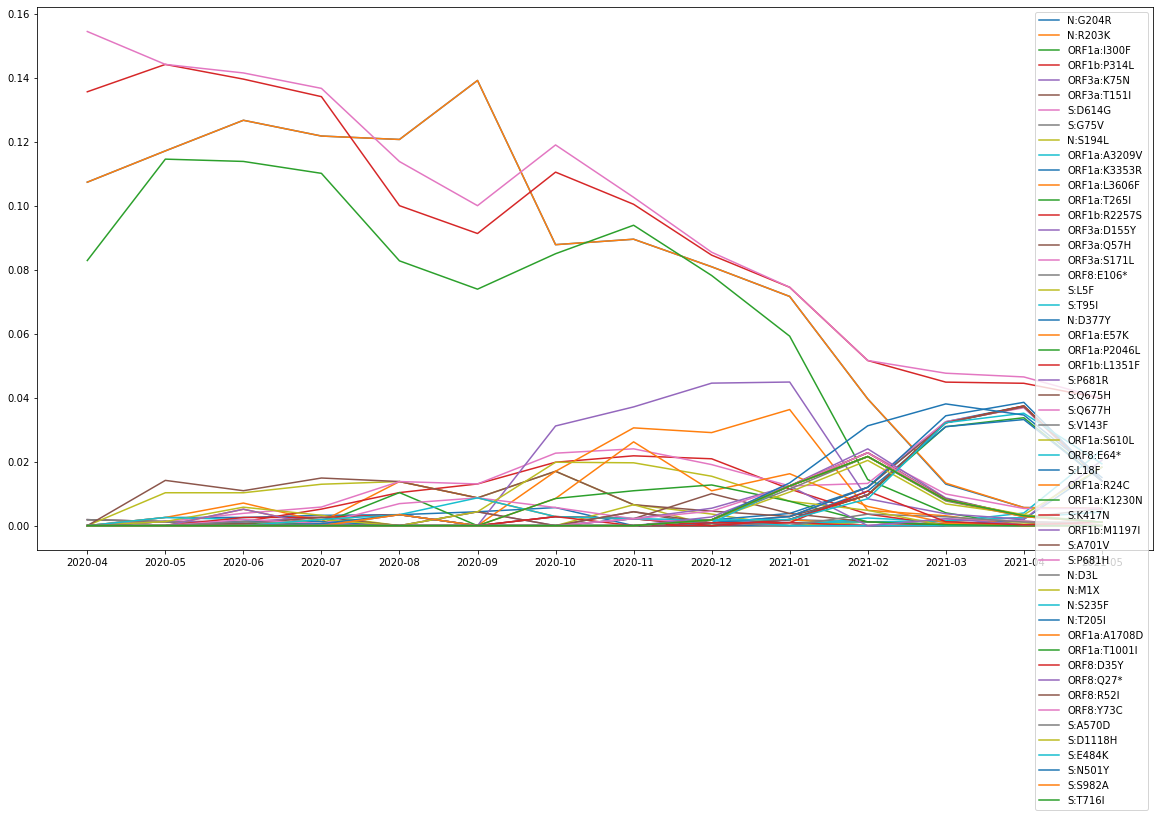

In [13]:
plt.rcParams["figure.figsize"] = (20,10)

# limit = 14
# plt.plot(month_arr[:limit], x, label="X")
# plt.plot(month_arr[:limit], y, label="Y")
# plt.legend(loc="upper right")

for mutation in mutation_freq_arr:
    plt.plot(month_arr, mutation_freq_arr[mutation], label=mutation)

plt.legend(loc="upper right")
plt.show()

# Read  Old Data

In [14]:
symptom_df = pd.read_csv("../symptom_frequency_monthWise - symptom_frequency_monthWise.csv")
symptom_df

,Symptom Name,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
0,High fever,646,440,976,257,165,177,55,61,33,18,5
1,Difficulty in breathing,4412,1745,5317,1055,490,405,195,234,175,103,14
2,Muscle pain,6139,3884,11889,2370,1292,1031,435,505,264,165,19
3,Dry cough,11219,5131,16114,3066,1807,1699,678,836,498,277,47
4,Not getting smell,1880,1943,7771,1763,1031,688,402,455,301,139,22
5,Feeling testless,3126,2829,8891,2029,1115,860,400,439,287,141,21
6,Fever,3563,3684,8302,2154,1260,1146,413,522,264,139,23
7,Sore throat,7051,3488,11351,2215,1058,889,412,427,273,148,19
8,Weakness,7950,910,2363,683,374,307,154,117,93,38,8
9,Itching eyes or turning red,5709,2295,9253,1372,632,433,225,272,155,89,18


In [15]:
symptom_freq_arr = {}

for index, row in symptom_df.iterrows():
    symptom_name = row['Symptom Name']
    symptom_freq_arr[symptom_name] = np.zeros(len(month_arr))
    for i in range(len(month_arr)):
        month = month_arr[i]
        if(month in row):
            symptom_freq_arr[symptom_name][i] = row[month]

In [16]:
symptom_freq_arr

{'High fever': array([646., 440., 976., 257., 165., 177.,  55.,  61.,  33.,  18.,   5.,
          0.,   0.,   0.]),
 'Difficulty in breathing': array([4412., 1745., 5317., 1055.,  490.,  405.,  195.,  234.,  175.,
         103.,   14.,    0.,    0.,    0.]),
 'Muscle pain': array([ 6139.,  3884., 11889.,  2370.,  1292.,  1031.,   435.,   505.,
          264.,   165.,    19.,     0.,     0.,     0.]),
 'Dry cough': array([11219.,  5131., 16114.,  3066.,  1807.,  1699.,   678.,   836.,
          498.,   277.,    47.,     0.,     0.,     0.]),
 'Not getting smell': array([1880., 1943., 7771., 1763., 1031.,  688.,  402.,  455.,  301.,
         139.,   22.,    0.,    0.,    0.]),
 'Feeling testless': array([3126., 2829., 8891., 2029., 1115.,  860.,  400.,  439.,  287.,
         141.,   21.,    0.,    0.,    0.]),
 'Fever': array([3563., 3684., 8302., 2154., 1260., 1146.,  413.,  522.,  264.,
         139.,   23.,    0.,    0.,    0.]),
 'Sore throat': array([ 7051.,  3488., 11351.,  2215., 

# Read new data (No data for march)

In [17]:
import json

with open("new_data.json", "r") as f:
    data = json.load(f)

In [18]:
data

{'Feeling pain and pressure in chest': {'2020-04': {'BD': 14533,
   'Dhaka': 3014},
  '2020-05': {'BD': 8918, 'Dhaka': 1534},
  '2020-06': {'BD': 26882, 'Dhaka': 3613},
  '2020-07': {'BD': 6692, 'Dhaka': 651},
  '2020-08': {'BD': 4468, 'Dhaka': 424},
  '2020-09': {'BD': 3280, 'Dhaka': 337},
  '2020-10': {'BD': 1481, 'Dhaka': 169},
  '2020-11': {'BD': 1575, 'Dhaka': 198},
  '2020-12': {'BD': 1117, 'Dhaka': 105},
  '2021-01': {'BD': 680, 'Dhaka': 63},
  '2021-02': {'BD': 129, 'Dhaka': 8},
  '2021-04': {'BD': 3494, 'Dhaka': 373},
  '2021-05': {'BD': 1186, 'Dhaka': 87},
  '2021-06': {'BD': 59, 'Dhaka': 8}},
 'Not getting smell': {'2020-04': {'BD': 4502, 'Dhaka': 873},
  '2020-05': {'BD': 5954, 'Dhaka': 1157},
  '2020-06': {'BD': 21205, 'Dhaka': 2768},
  '2020-07': {'BD': 6498, 'Dhaka': 641},
  '2020-08': {'BD': 5441, 'Dhaka': 458},
  '2020-09': {'BD': 3541, 'Dhaka': 333},
  '2020-10': {'BD': 1815, 'Dhaka': 245},
  '2020-11': {'BD': 2299, 'Dhaka': 273},
  '2020-12': {'BD': 1390, 'Dhaka': 16

In [20]:
symptom_freq_arr = {}

for symptom in data:
    arr = []
    for month in data[symptom]:
        arr.append(data[symptom][month]['BD'])
    symptom_freq_arr[symptom] = np.array(arr)
    
symptom_freq_arr

{'Feeling pain and pressure in chest': array([14533,  8918, 26882,  6692,  4468,  3280,  1481,  1575,  1117,
          680,   129,  3494,  1186,    59]),
 'Not getting smell': array([ 4502,  5954, 21205,  6498,  5441,  3541,  1815,  2299,  1390,
          723,   138,  2292,   928,    64]),
 'Dry cough': array([24309, 15542, 43564, 11899,  9638,  8587,  3220,  4032,  2549,
         1574,   251,  5597,  1985,   142]),
 'Diabetes': array([ 6855,  5161, 16188,  4000,  2561,  1561,   781,   854,   687,
          440,   100,  1716,   617,    48]),
 'Kidney problem': array([2103, 1215, 3810,  925,  605,  417,  216,  220,  179,  105,   22,
         508,  189,   15]),
 'Fever': array([ 8234, 10433, 22935,  8177,  6681,  5747,  1985,  2332,  1351,
          814,   140,  2206,  1193,    82]),
 'Sore throat': array([16322, 11089, 30772,  8344,  5953,  4587,  1973,  2056,  1271,
          870,   155,  3024,  1256,    82]),
 'Difficulty in breathing': array([ 9820,  5524, 14511,  3923,  2524,  2008,

# Multi Regression

In [21]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [22]:
def applyMinMaxNorm(arr):
    arr = np.array(arr)
    ret = np.zeros(len(arr))
    
    mx = arr.max()
    mn = arr.min()

    for i in range(len(arr)):
        ret[i] = (arr[i] - mn)/(mx - mn)
    
    return ret

# Misc

In [25]:
# symptom = 'High fever'
# mutation1 = 'ORF1b'
# mutation2 = 'ORF3a'

# limit = 14

# x1 = applyMinMaxNorm(mutation_freq_arr[mutation1][:limit])
# x2 = applyMinMaxNorm(mutation_freq_arr[mutation2][:limit])
# y = applyMinMaxNorm(symptom_freq_arr[symptom][:limit])

In [26]:
# y

In [27]:
# plt.rcParams["figure.figsize"] = (20,10)
# plt.plot(month_arr[:limit], x1, label="X1", color="blue")
# plt.plot(month_arr[:limit], x2, label="X2", color="blue")
# plt.plot(month_arr[:limit], y, label="Y", color="red")
# plt.legend(loc="upper right")

# Multiple Regression

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [29]:
def getFeatureVector(feature_arr):
    ln = len(feature_arr[0])
    ret = []
    for i in range(ln):
        ret.append([])
        
    for arr in feature_arr:
        for i in range(len(arr)):
            ret[i].append(arr[i])
    return np.array(ret)

In [31]:
# print(getFeatureVector([x1,x2]).shape)
# getFeatureVector([x1,x2])

In [32]:
# regr = linear_model.LinearRegression()
# X = getFeatureVector([x1,x2])
# print(X.shape)
# regr.fit(X, y)

In [33]:
# print(regr.coef_)
# print(regr.intercept_)
# print(regr.score(X,y))

In [34]:
# print(regr.coef_[0])

In [35]:
# y_pred = regr.predict(X)
# mean_squared_error(y_pred, y)

In [36]:
def getXY(mutation_arr, symptom, limit = -1):
    y = applyMinMaxNorm(symptom_freq_arr[symptom])
    xrr = []
    for mutation in mutation_arr:
        x = applyMinMaxNorm(mutation_freq_arr[mutation])
        xrr.append(x)
        
    if(limit != -1):
        y = y[:limit]
        for i in range(len(xrr)):
            xrr[i] = xrr[i][:limit]
    return xrr, y

In [37]:
def plotFormattedData(mutation_arr, symptom, limit = -1):
    xrr, y = getXY(mutation_arr, symptom, limit)
    month_arr = list(set(list(clade_df['month'])))
    month_arr = sorted(month_arr)
    if(limit!=-1):
        month_arr = month_arr[:limit]
    
    for i in range(len(mutation_arr)):
        mutation = mutation_arr[i]
        x = xrr[i]
        plt.plot(month_arr, x, label=mutation)
    
    plt.plot(month_arr, y, label=symptom, linewidth=5)
    plt.legend(loc="upper right")
    plt.show()

In [38]:
def performMultipleRegression(mutation_arr, symptom, limit = -1):
    
    xrr, y = getXY(mutation_arr, symptom, limit)
            
    X = getFeatureVector(xrr)
#     print(X.shape, y.shape)
    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    
    coef = regr.coef_
    r_squared = regr.score(X, y)
    y_pred = regr.predict(X)
    mse = mean_squared_error(y_pred, y)
    
    weights = {}
    for i in range(len(mutation_arr)):
        weights[mutation_arr[i]] = coef[i]
        
    return {
        "weights"  : weights,
        "r_squared": r_squared,
        "mse"      : mse,
        "mutations": mutation_arr
    }

In [55]:
# plotFormattedData(['ORF1b', 'ORF3a'], 'High fever', limit=-1)

In [58]:
# performMultipleRegression(['ORF1b'], 'High fever', limit=11)

In [59]:
##########################################################################################

In [60]:
for symp in symptom_freq_arr:
    print(symp)

Feeling pain and pressure in chest
Not getting smell
Dry cough
Diabetes
Kidney problem
Fever
Sore throat
Difficulty in breathing
High blood pressure
High fever
Weakness
Itching eyes or turning red
Sleepiness
Respiratory illness
Feeling testless
Muscle pain
Abdominal pain, nausea or thin closet
Cancer
Heart diseases


In [61]:
symptom = "Difficulty in breathing"
limit = -1

In [62]:
##########################################################################################

# Filter Positive Slopes

In [63]:
mutation_arr = []
has_positive_slopes = []
for mutation in mutation_freq_arr:
    mutation_arr.append(mutation)
    reg_vals = performMultipleRegression([mutation], symptom, limit)
    weight = -1
    for key in reg_vals['weights']:
        weight = reg_vals['weights'][key]
    if(weight > 0):
        has_positive_slopes.append(mutation)
    print(mutation, weight)

N:G204R 0.4345096733821838
N:R203K 0.4350131280495978
ORF1a:I300F 0.42701704360221016
ORF1b:P314L 0.5712622519768994
ORF3a:K75N 0.2532996318011375
ORF3a:T151I 0.09842460577492294
S:D614G 0.5882093121879979
S:G75V 0.21963633696069665
N:S194L 0.17057078889016
ORF1a:A3209V -0.2984591808151252
ORF1a:K3353R -0.30290642231627074
ORF1a:L3606F 0.22033626289192593
ORF1a:T265I -0.26288551564305646
ORF1b:R2257S -0.2983891831977963
ORF3a:D155Y 0.231876479752474
ORF3a:Q57H -0.2505514690652595
ORF3a:S171L -0.5937396210508049
ORF8:E106* -0.347042317563374
S:L5F 0.36201623153001744
S:T95I -0.09041396354300033
N:D377Y -0.24253425480266266
ORF1a:E57K -0.2516818115250529
ORF1a:P2046L -0.2674493909606198
ORF1b:L1351F 0.15730738289598373
S:P681R -0.3182533748814564
S:Q675H -0.26121053612275
S:Q677H -0.10091542967602692
S:V143F -0.12211398811056913
ORF1a:S610L -0.29579907273323786
ORF8:E64* -0.20492753187207632
S:L18F -0.2714211595768685
ORF1a:R24C -0.35992884600943187
ORF1a:K1230N -0.2873336996782545
S:K41

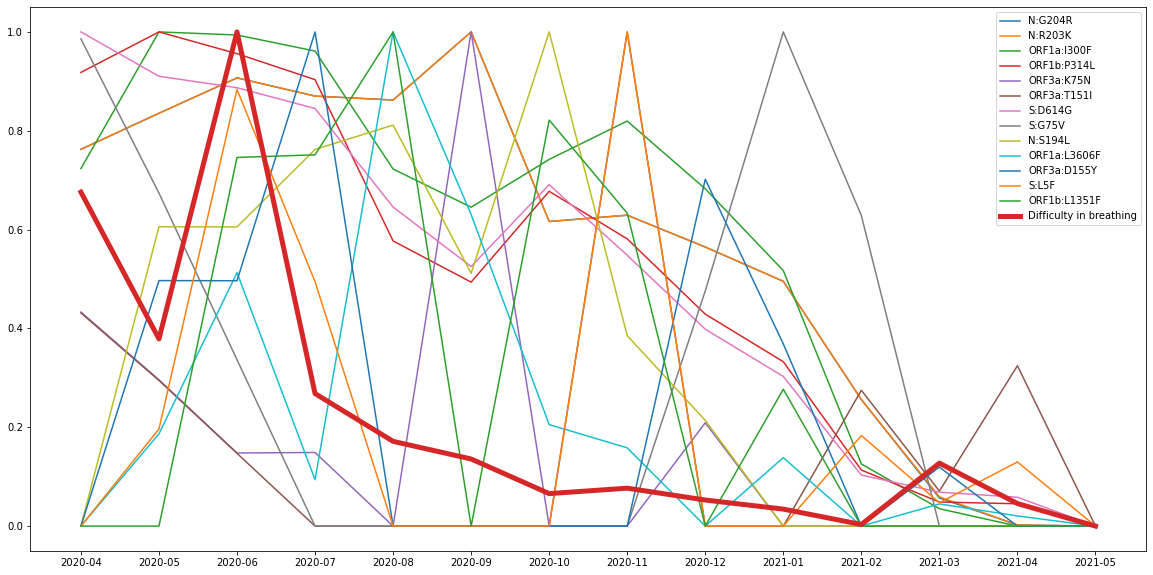

In [64]:
plotFormattedData(has_positive_slopes, symptom, limit)

# Check all combinations

In [65]:
import itertools
from operator import itemgetter

In [66]:
all_combinations = []
for i in range(1, len(has_positive_slopes)+1):
    current_combinations = itertools.combinations(has_positive_slopes, i)
    for comb in current_combinations:
#         print(list(comb))
        all_combinations.append(list(comb))
all_combinations

[['N:G204R'],
 ['N:R203K'],
 ['ORF1a:I300F'],
 ['ORF1b:P314L'],
 ['ORF3a:K75N'],
 ['ORF3a:T151I'],
 ['S:D614G'],
 ['S:G75V'],
 ['N:S194L'],
 ['ORF1a:L3606F'],
 ['ORF3a:D155Y'],
 ['S:L5F'],
 ['ORF1b:L1351F'],
 ['N:G204R', 'N:R203K'],
 ['N:G204R', 'ORF1a:I300F'],
 ['N:G204R', 'ORF1b:P314L'],
 ['N:G204R', 'ORF3a:K75N'],
 ['N:G204R', 'ORF3a:T151I'],
 ['N:G204R', 'S:D614G'],
 ['N:G204R', 'S:G75V'],
 ['N:G204R', 'N:S194L'],
 ['N:G204R', 'ORF1a:L3606F'],
 ['N:G204R', 'ORF3a:D155Y'],
 ['N:G204R', 'S:L5F'],
 ['N:G204R', 'ORF1b:L1351F'],
 ['N:R203K', 'ORF1a:I300F'],
 ['N:R203K', 'ORF1b:P314L'],
 ['N:R203K', 'ORF3a:K75N'],
 ['N:R203K', 'ORF3a:T151I'],
 ['N:R203K', 'S:D614G'],
 ['N:R203K', 'S:G75V'],
 ['N:R203K', 'N:S194L'],
 ['N:R203K', 'ORF1a:L3606F'],
 ['N:R203K', 'ORF3a:D155Y'],
 ['N:R203K', 'S:L5F'],
 ['N:R203K', 'ORF1b:L1351F'],
 ['ORF1a:I300F', 'ORF1b:P314L'],
 ['ORF1a:I300F', 'ORF3a:K75N'],
 ['ORF1a:I300F', 'ORF3a:T151I'],
 ['ORF1a:I300F', 'S:D614G'],
 ['ORF1a:I300F', 'S:G75V'],
 ['ORF1a:I

In [67]:
from tqdm import tqdm
track = []

for i in tqdm(range(len(all_combinations))):
    comb = all_combinations[i]
    reg_val = performMultipleRegression(comb, symptom, limit)
#     print(reg_val)
    track.append(reg_val)

100%|██████████| 8191/8191 [00:08<00:00, 1015.33it/s]


In [68]:
sorted(track, key=itemgetter('r_squared'), reverse=True)

[{'weights': {'N:G204R': -0.7968848753863551,
   'N:R203K': -1.2825735510838254,
   'ORF1a:I300F': 0.5125404162813701,
   'ORF1b:P314L': -4.897773927737217,
   'ORF3a:K75N': 0.4763061529579126,
   'ORF3a:T151I': -0.8649667389418425,
   'S:D614G': 5.953055595202784,
   'S:G75V': 0.609001358278175,
   'N:S194L': 0.45864317318541326,
   'ORF1a:L3606F': 0.737035688737344,
   'ORF3a:D155Y': 0.16930701224795408,
   'S:L5F': 1.457022566007218,
   'ORF1b:L1351F': -0.5323805345509448},
  'r_squared': 1.0,
  'mse': 1.6895883684635315e-30,
  'mutations': ['N:G204R',
   'N:R203K',
   'ORF1a:I300F',
   'ORF1b:P314L',
   'ORF3a:K75N',
   'ORF3a:T151I',
   'S:D614G',
   'S:G75V',
   'N:S194L',
   'ORF1a:L3606F',
   'ORF3a:D155Y',
   'S:L5F',
   'ORF1b:L1351F']},
 {'weights': {'N:R203K': -2.077832678316722,
   'ORF1a:I300F': 0.513133131045977,
   'ORF1b:P314L': -4.905037625024773,
   'ORF3a:K75N': 0.47361737797464687,
   'ORF3a:T151I': -0.866554703090214,
   'S:D614G': 5.960373651125564,
   'S:G75V': 

In [69]:
sorted(track, key=itemgetter('mse'), reverse=False)

[{'weights': {'N:G204R': -0.7968848753863551,
   'N:R203K': -1.2825735510838254,
   'ORF1a:I300F': 0.5125404162813701,
   'ORF1b:P314L': -4.897773927737217,
   'ORF3a:K75N': 0.4763061529579126,
   'ORF3a:T151I': -0.8649667389418425,
   'S:D614G': 5.953055595202784,
   'S:G75V': 0.609001358278175,
   'N:S194L': 0.45864317318541326,
   'ORF1a:L3606F': 0.737035688737344,
   'ORF3a:D155Y': 0.16930701224795408,
   'S:L5F': 1.457022566007218,
   'ORF1b:L1351F': -0.5323805345509448},
  'r_squared': 1.0,
  'mse': 1.6895883684635315e-30,
  'mutations': ['N:G204R',
   'N:R203K',
   'ORF1a:I300F',
   'ORF1b:P314L',
   'ORF3a:K75N',
   'ORF3a:T151I',
   'S:D614G',
   'S:G75V',
   'N:S194L',
   'ORF1a:L3606F',
   'ORF3a:D155Y',
   'S:L5F',
   'ORF1b:L1351F']},
 {'weights': {'N:R203K': -2.077832678316722,
   'ORF1a:I300F': 0.513133131045977,
   'ORF1b:P314L': -4.905037625024773,
   'ORF3a:K75N': 0.47361737797464687,
   'ORF3a:T151I': -0.866554703090214,
   'S:D614G': 5.960373651125564,
   'S:G75V': 